In [1]:
import piplite
await piplite.install('seaborn')
await piplite.install('hvplot')

### Import Libraries

Для визуализации и анализа данных нам понадобятся следующие библиотеки Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

Считываем датасет

In [3]:
df = pd.read_csv('./dataset/real_estate.csv')

### Поля в таблице:
    
* X1 - transaction date
* X2 - house age
* X3 - distance to the nearest MRT station
* X4 - number of convenience stores
* X5 - latitude
* X6 - longitude
* Y - house price of unit area

Выведем таблицу на экран

In [4]:
df

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
df.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Отобразим размерность таблицы

In [6]:
df.shape

(414, 8)

Выведем краткую информацию о данных и убедимся, что у нас нет null-полей

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      414 non-null    int64  
 1   X1      414 non-null    float64
 2   X2      414 non-null    float64
 3   X3      414 non-null    float64
 4   X4      414 non-null    int64  
 5   X5      414 non-null    float64
 6   X6      414 non-null    float64
 7   Y       414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 25.9 KB


In [8]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


## Анализ количественной информации

#### Анализ данных по X2 - House Age

<AxesSubplot:>

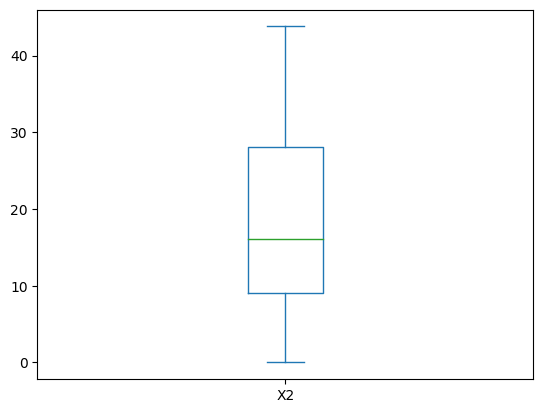

In [9]:
df['X2'].plot(kind='box')

На этом графике мы наблюдаем, что у нас достаточно неплохие данные и в них нет выбросов. Для нас это, безусловно, хорошо.

In [10]:
np.quantile(df['X2'], 0.75) - np.quantile(df['X2'], 0.25)

19.125

In [11]:
np.quantile(df['X2'], 0.75), np.quantile(df['X2'], 0.25)

(28.15, 9.025)

Верхняя квантилия - 28.15, нижняя - 9.025. 

In [12]:
df['X2'].min(), df['X2'].max()

(0.0, 43.8)

Минимальные и максимальные значения наших данных в конкретном поле

<AxesSubplot:>

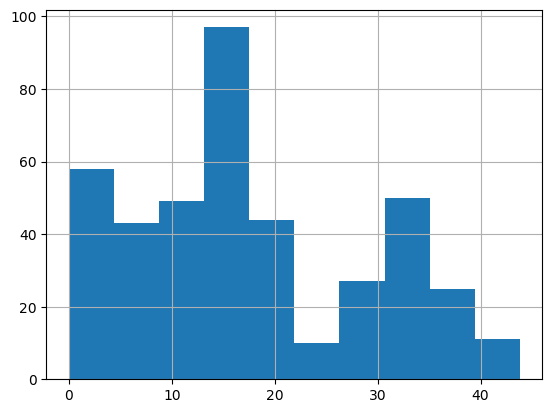

In [13]:
df['X2'].hist()

<AxesSubplot:ylabel='Density'>

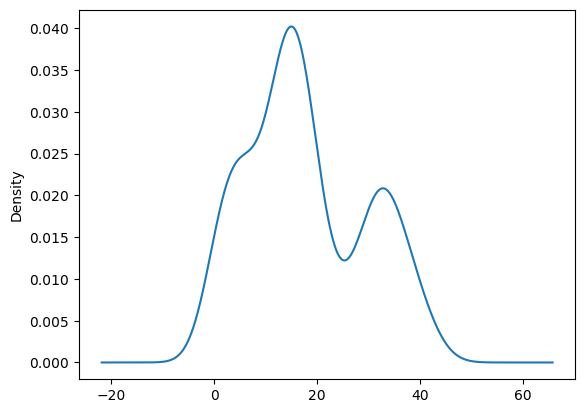

In [14]:
df['X2'].plot(kind ='kde')

#### Анализ данных по X3 - Distance to the nearest MRT station

<AxesSubplot:>

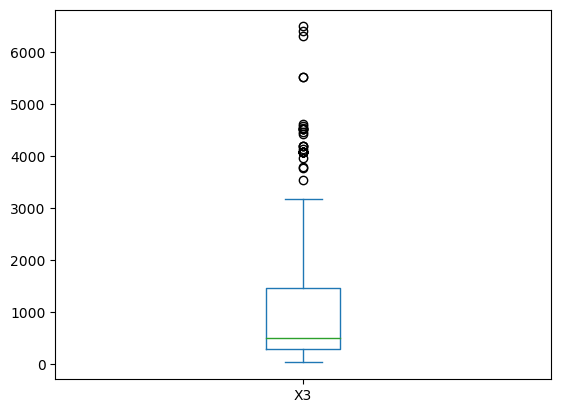

In [15]:
df['X3'].plot(kind='box')

На этом графике мы видим, что у нас есть достаточно много выбросов, которые уходят за рамки наших квантилей.

In [16]:
np.quantile(df['X3'], 0.75) - np.quantile(df['X3'], 0.25)

1164.9542000000001

In [17]:
np.quantile(df['X3'], 0.75), np.quantile(df['X3'], 0.25)

(1454.279, 289.3248)

Верхняя квантилия - 1454.279, нижняя - 289.3248.

In [18]:
df['X3'].min(), df['X3'].max()

(23.38284, 6488.021)

Минимальные и максимальные данные в конкретном поле таблицы.

<AxesSubplot:>

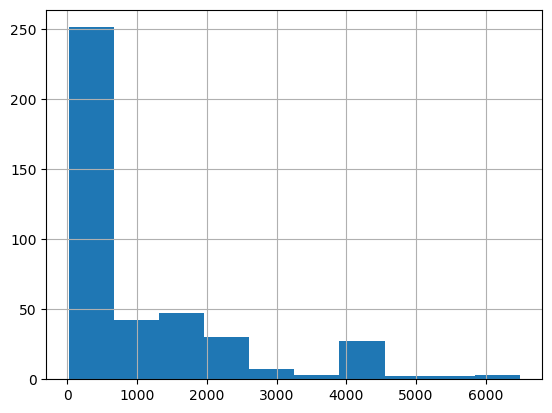

In [19]:
df['X3'].hist()

<AxesSubplot:ylabel='Density'>

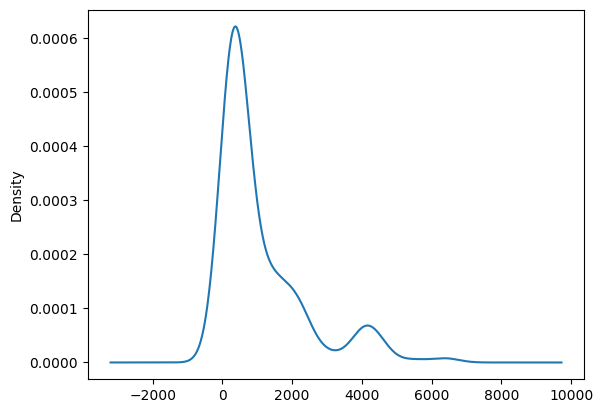

In [20]:
df['X3'].plot(kind ='kde')

#### Анализ данных по X5 - Latitude

<AxesSubplot:>

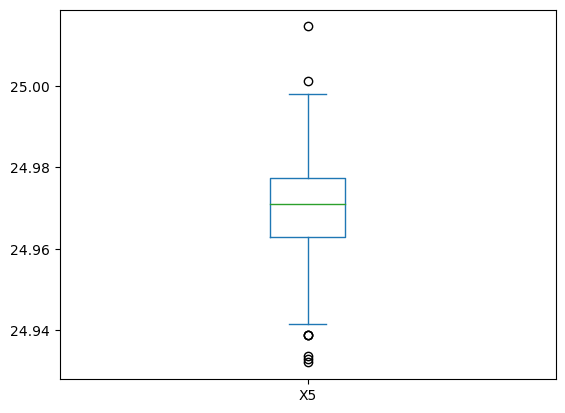

In [21]:
df['X5'].plot(kind='box')

Мы видим на этом графике, что у нас есть выбросы как выше верхней квантилии, так и ниже. Выбросов не сильно много, что хорошо.

In [22]:
np.quantile(df['X5'], 0.75) - np.quantile(df['X5'], 0.25)

0.014454999999998108

In [23]:
np.quantile(df['X5'], 0.75), np.quantile(df['X5'], 0.25)

(24.977455, 24.963)

Верхния квантилия - 24.97, нижняя - 24.963. Данные дома с датасета расположены приблизительно в одном районе, поэтому имеют приблизительные координаты.

In [24]:
df['X5'].min(), df['X5'].max()

(24.93207, 25.01459)

Максимальное и минимальное значение в данном поле таблицы.

<AxesSubplot:>

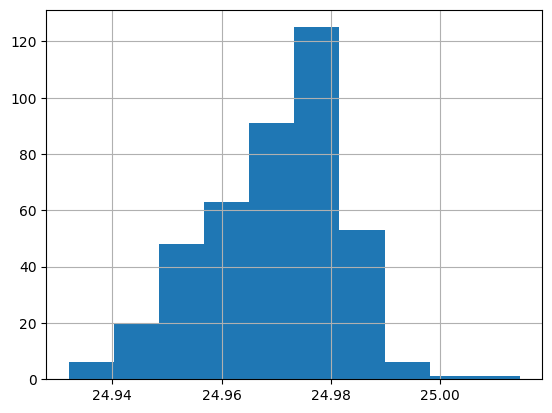

In [25]:
df['X5'].hist()

<AxesSubplot:ylabel='Density'>

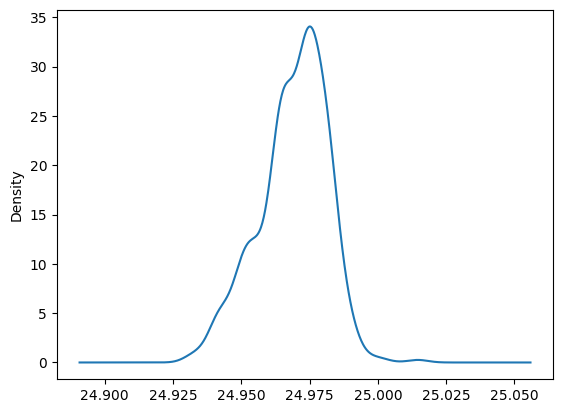

In [26]:
df['X5'].plot(kind ='kde')

#### Анализ данных по X6 - Longitude

<AxesSubplot:>

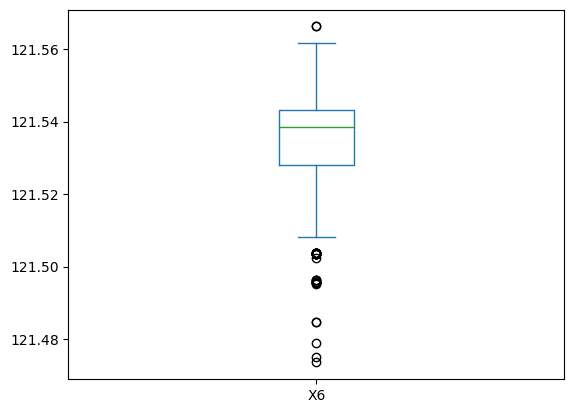

In [27]:
df['X6'].plot(kind='box')

На этом графике мы можем наблюдать, что у нас также присутствуют выбросы ниже нижней квантилии и один выброс выше верхней квантилии. 

In [28]:
np.quantile(df['X6'], 0.75) - np.quantile(df['X6'], 0.25)

0.015219999999999345

In [29]:
np.quantile(df['X6'], 0.75), np.quantile(df['X6'], 0.25)

(121.543305, 121.528085)

Верхния квантилия - 121.54, нижняя - 121.52. Дома расположены приблизительно в одном районе, поэтому разброс не сильно большой.

In [30]:
df['X6'].min(), df['X6'].max()

(121.47353, 121.56627)

Максимальные и минимальные значения в данном поле таблицы.

<AxesSubplot:>

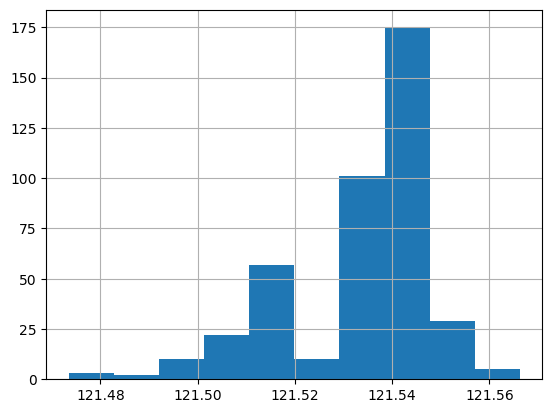

In [31]:
df['X6'].hist()

<AxesSubplot:ylabel='Density'>

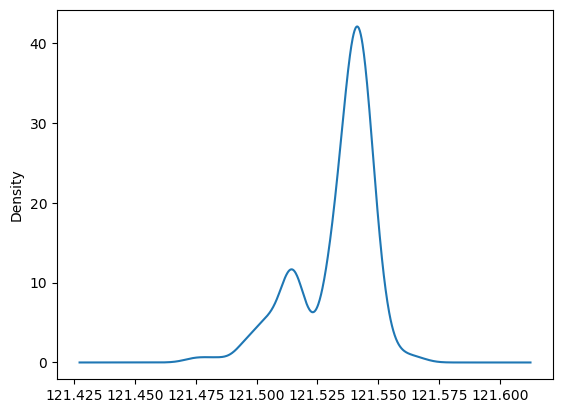

In [32]:
df['X6'].plot(kind ='kde')

## Анализ категориальной информации

Категориальной информацией в данном случае будет являться поле X1 и X4 (дата транзакции и количество магазинов рядом с домом).

Построим диаграмму, которая покажет количество купленных домов в конкретную дату (всего их 12).

<AxesSubplot:xlabel='X1', ylabel='count'>

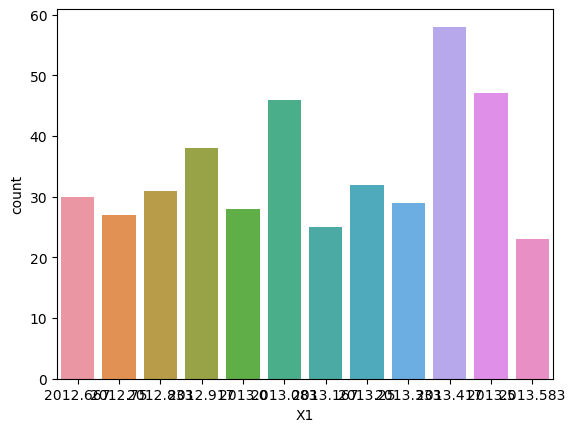

In [33]:
sns.countplot(x = 'X1', data = df)

Введем новое поле в таблицу, которая покажет Bool-значение в случае, если стоимость дома превысила значение 50.0.

In [34]:
df['BoolY'] = df['Y']  > 50.0

#### Сравним распределение по классам

<AxesSubplot:xlabel='X1', ylabel='count'>

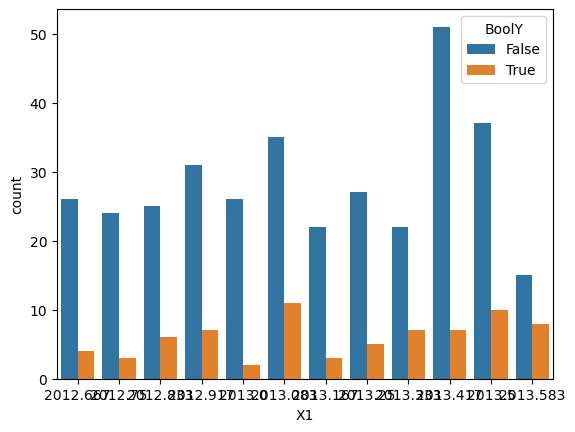

In [35]:
sns.countplot(x = 'X1', hue = 'BoolY', data = df)

На данном графике мы можем наблюдать, насколько влияет дата транзакции на покупку дома, когда его стоимость выше 50.0. 
True - дом купили, False - дом не купили.

Построим диаграмму, которая покажет количество магазинов рядом с домом (всего их 10).

<AxesSubplot:xlabel='X4', ylabel='count'>

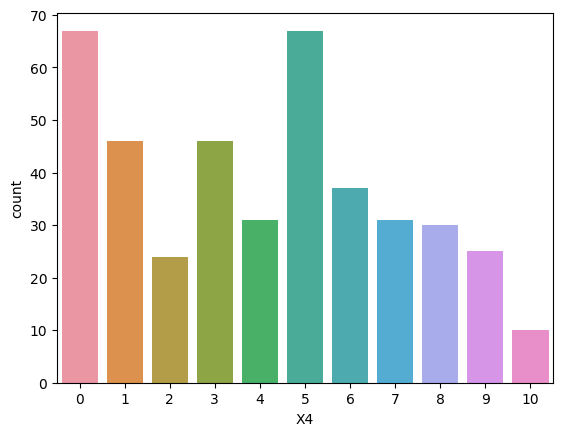

In [36]:
sns.countplot(x = 'X4', data = df)

#### Сравним распределение по классам

<AxesSubplot:xlabel='X4', ylabel='count'>

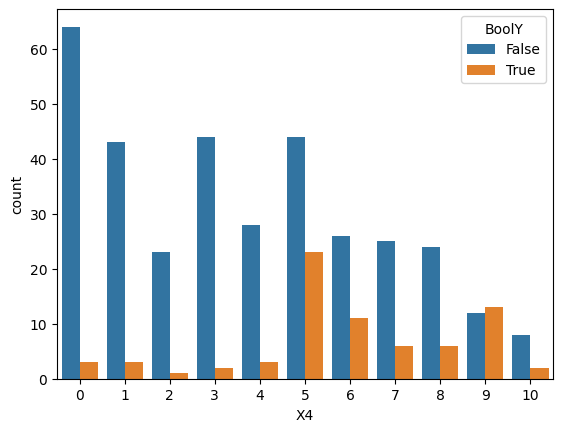

In [37]:
sns.countplot(x = 'X4', hue = 'BoolY', data = df)

Отобразим снова таблицу и увидим новое добавленное поле

In [38]:
df

,No,X1,X2,X3,X4,X5,X6,Y,BoolY
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,False
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,False
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,False
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,True
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,False
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,False
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,False
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,False
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,True


## Сравнение распределений признаков для разных классов

Сравним распределение признаков поля BoolY и поля X4.

<AxesSubplot:xlabel='BoolY', ylabel='X4'>

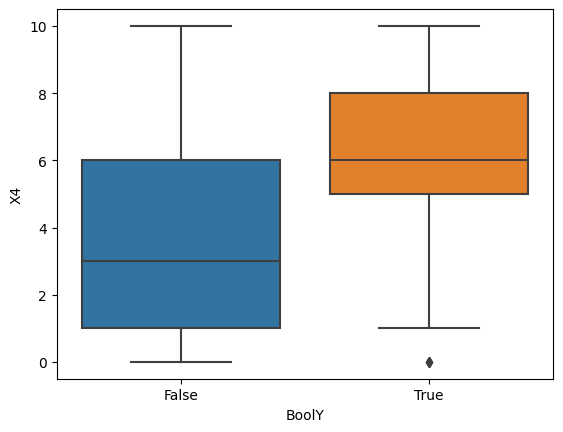

In [39]:
sns.boxplot(x ='BoolY', y = 'X4', data = df)

Сравним распределение признаков поля BoolY и поля X1.

<AxesSubplot:xlabel='BoolY', ylabel='X1'>

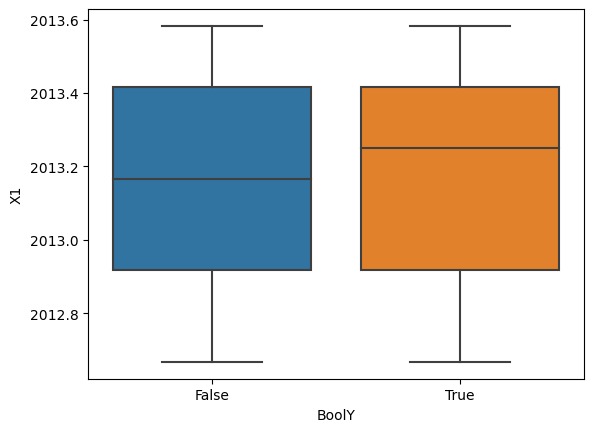

In [40]:
sns.boxplot(x ='BoolY', y = 'X1', data = df)

## Анализ зависимости двух непрерывных переменных

Продемонстрируем зависимость признаков X2, X3, X5 и X6 друг от друга.

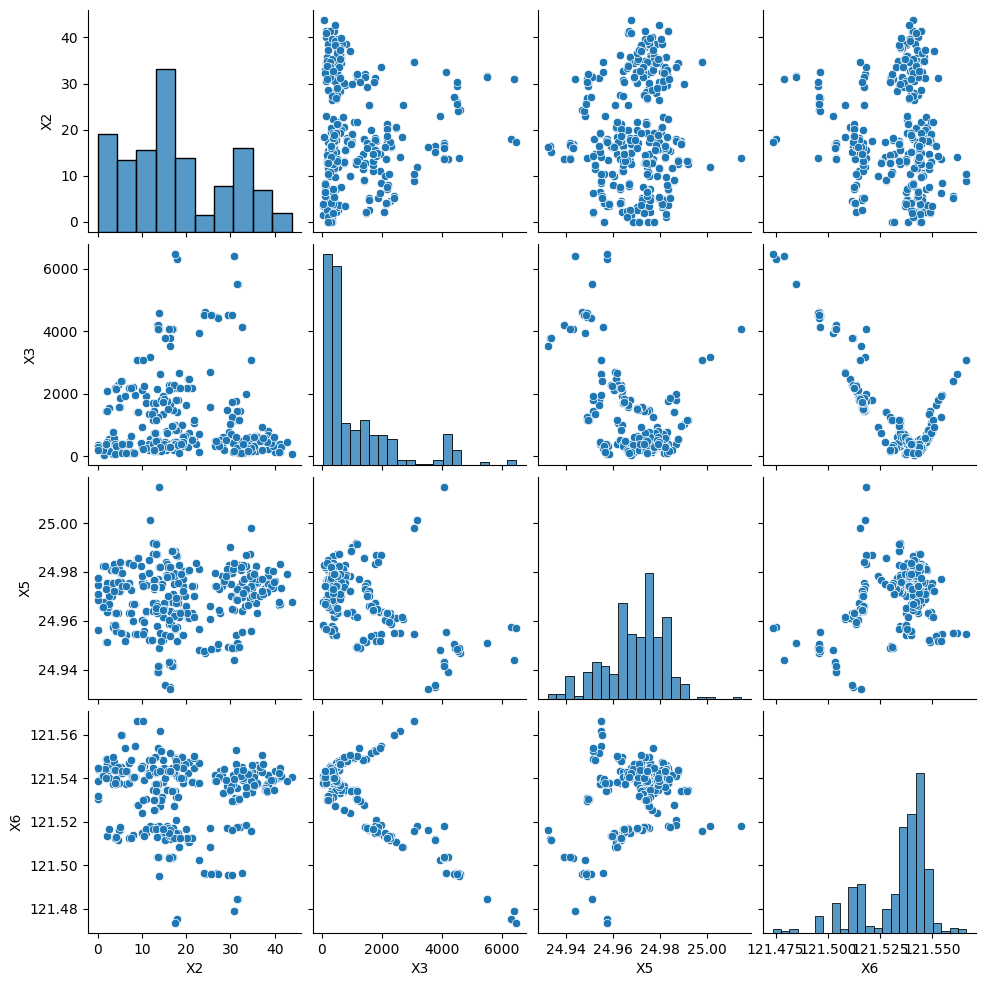

In [41]:
sns.pairplot(df[['X2', 'X3', 'X5', 'X6']])

Разница в числовых значениях очень большая. Проведём корреляцию данных и получим зависимость каждого параметра от каждого последующего.

In [42]:
corr = df[['X2', 'X3', 'X5', 'X6', 'Y']].corr()
corr

,X2,X3,X5,X6,Y
X2,1.000000,0.025622,0.054420,-0.048520,-0.210567
X3,0.025622,1.000000,-0.591067,-0.806317,-0.673613
X5,0.054420,-0.591067,1.000000,0.412924,0.546307
X6,-0.048520,-0.806317,0.412924,1.000000,0.523287
Y,-0.210567,-0.673613,0.546307,0.523287,1.000000


Выведем значения корреляции для каждого конкретного поля в таблице.

In [43]:
corr['X2']

X2    1.000000
X3    0.025622
X5    0.054420
X6   -0.048520
Y    -0.210567
Name: X2, dtype: float64

In [44]:
corr['X3']

X2    0.025622
X3    1.000000
X5   -0.591067
X6   -0.806317
Y    -0.673613
Name: X3, dtype: float64

In [45]:
corr['X5']

X2    0.054420
X3   -0.591067
X5    1.000000
X6    0.412924
Y     0.546307
Name: X5, dtype: float64

In [46]:
corr['X6']

X2   -0.048520
X3   -0.806317
X5    0.412924
X6    1.000000
Y     0.523287
Name: X6, dtype: float64

Визуализируем скоррелированные данные. Как мы можем наблюдать, у нас есть значения, которые стремяться к 1 или -1. Это не есть хорошо, так как это означает, что разрыв между данными в этих полях наиболее существенный.

<AxesSubplot:>

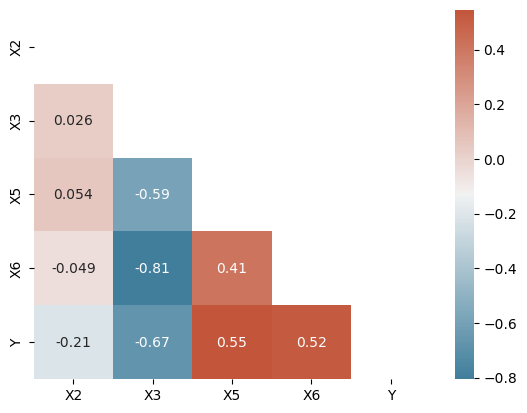

In [47]:
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, annot = True, mask = mask, cmap = cmap)

Визуализируем зависимость класса X4 от класса X2 по отношению к классу BoolY.

<AxesSubplot:xlabel='X4', ylabel='X2'>

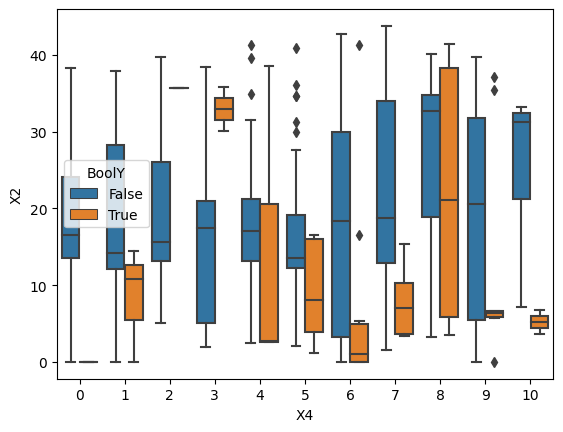

In [85]:
sns.boxplot(x = 'X4', y = 'X2', hue = 'BoolY', data = df)